In [1]:
import matplotlib
import matplotlib.pyplot as plt
from mmcg import mmcg
import numpy as np
import operator
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/zsherman/dev/pyart/pyart/graph/cm.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/home/zsherman/dev/pyart/pyart/graph/cm_colorblind.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:


In [2]:
radar = pyart.io.read('/home/zsherman/sgpxsaprcmacsurI5.c1.20171004.203018.nc')

In [3]:
grid = mmcg(radar, grid_shape=(31, 101, 101),
            grid_limits=((0, 15000), (-50000, 50000), (-50000, 50000)),
            z_linear_interp=True, toa=15000, weighting_function='cressman')

/home/zsherman/dev/mmcg/mmcg/grid.py:109: RuntimeWarning: divide by zero encountered in log10
  ref_log_grid = 10.0*(np.log10(grid.fields['reflectivity']['data']))
/home/zsherman/dev/mmcg/mmcg/grid.py:118: RuntimeWarning: divide by zero encountered in log10
  tot_log_grid = 10.0*(np.log10(grid.fields['total_power']['data']))
/home/zsherman/dev/mmcg/mmcg/grid.py:128: RuntimeWarning: divide by zero encountered in log10
  np.log10(grid.fields['corrected_reflectivity']['data']))


/home/zsherman/dev/pyart/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/zsherman/.conda/envs/cmac_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


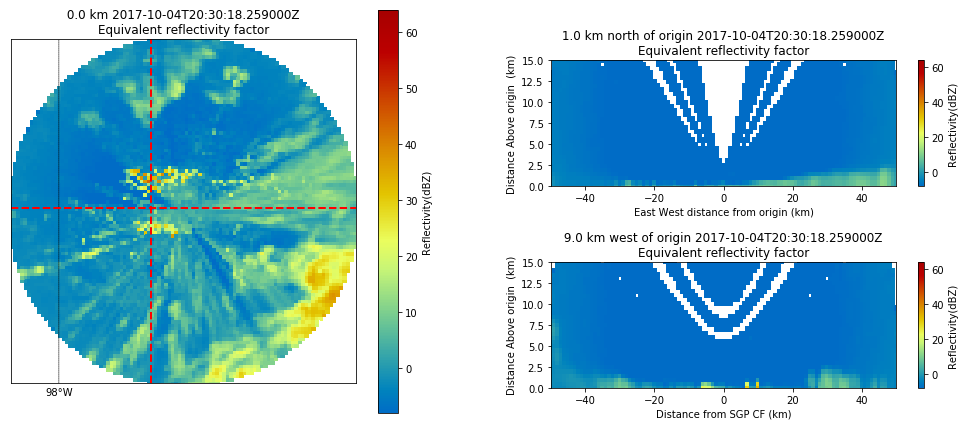

In [9]:
display = pyart.graph.GridMapDisplay(grid)
fig = plt.figure(figsize=[15, 7])

# Panel sizes.
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

# Parameters.
level = 0
vmin = -8
vmax = 64
lat = 36.5
lon = -97.7

# Panel 1, basemap, radar reflectivity and NARR overlay.
ax1 = fig.add_axes(map_panel_axes)
display.plot_basemap(lon_lines = np.arange(-104, -93, 2))
display.plot_grid('reflectivity', level=level, vmin=vmin, vmax=vmax,
                  cmap='pyart_HomeyerRainbow')
display.plot_crosshairs(lon=lon, lat=lat)

# Panel 2, longitude slice.
ax2 = fig.add_axes(x_cut_panel_axes)
display.plot_longitude_slice('reflectivity', lon=lon, lat=lat, vmin=vmin, vmax=vmax,
                             cmap='pyart_HomeyerRainbow')
ax2.set_ylim([0, 15])
ax2.set_xlim([-50, 50])
ax2.set_xlabel('Distance from SGP CF (km)')

# Panel 3, latitude slice.
ax3 = fig.add_axes(y_cut_panel_axes)
ax3.set_ylim([0, 15])
ax3.set_xlim([-50, 50])
display.plot_latitude_slice('reflectivity', lon=lon, lat=lat, vmin=vmin, vmax=vmax,
                            cmap='pyart_HomeyerRainbow')
# plt.savefig('')

In [6]:
cat_dict = {}
print('##')
print('## Keys for each gate id are as follows:')
for pair_str in grid.fields['gate_id']['notes'].split(','):
    print('##   ', str(pair_str))
    cat_dict.update({pair_str.split(':')[1]:int(pair_str.split(':')[0])})
sorted_cats = sorted(cat_dict.items(), key=operator.itemgetter(1))
cat_colors = {'rain': 'green',
              'multi_trip': 'red',
              'no_scatter': 'gray',
              'snow': 'cyan',
              'melting': 'yellow'}
lab_colors = ['red', 'cyan', 'grey', 'green', 'yellow']
if 'xsapr_clutter' in grid.fields.keys():
    cat_colors['clutter'] = 'black'
    lab_colors = np.append(lab_colors, 'black')
lab_colors = [cat_colors[kitty[0]] for kitty in sorted_cats]
cmap = matplotlib.colors.ListedColormap(lab_colors)

##
## Keys for each gate id are as follows:
##    0:multi_trip
##    1:rain
##    2:snow
##    3:no_scatter
##    4:melting
##    5:clutter


/home/zsherman/dev/pyart/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/zsherman/.conda/envs/cmac_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


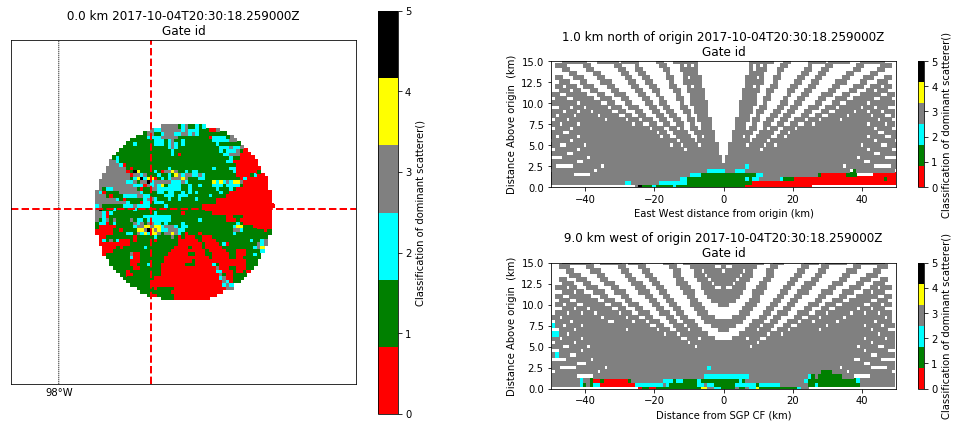

In [11]:
display = pyart.graph.GridMapDisplay(grid)
fig = plt.figure(figsize=[15, 7])

# Panel sizes.
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

# Parameters.
level = 0
vmin = 0
vmax = 5
lat = 36.5
lon = -97.7

# Panel 1, basemap, radar reflectivity and NARR overlay.
ax1 = fig.add_axes(map_panel_axes)
display.plot_basemap(lon_lines = np.arange(-104, -93, 2))
display.plot_grid('gate_id', level=level, vmin=vmin, vmax=vmax,
                  cmap=cmap)
display.plot_crosshairs(lon=lon, lat=lat)

# Panel 2, longitude slice.
ax2 = fig.add_axes(x_cut_panel_axes)
display.plot_longitude_slice('gate_id', lon=lon, lat=lat, vmin=vmin,
                             vmax=vmax, cmap=cmap)
ax2.set_ylim([0, 15])
ax2.set_xlim([-50, 50])
ax2.set_xlabel('Distance from SGP CF (km)')

# Panel 3, latitude slice.
ax3 = fig.add_axes(y_cut_panel_axes)
ax3.set_ylim([0, 15])
ax3.set_xlim([-50, 50])
display.plot_latitude_slice('gate_id', lon=lon, lat=lat, vmin=vmin,
                            vmax=vmax, cmap=cmap)

/home/zsherman/.conda/envs/cmac_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


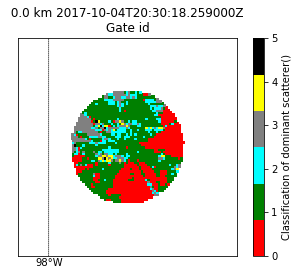

In [15]:
level = 0
vmin = 0
vmax = 5
lat = 36.5
lon = -97.7
display.plot_basemap(lon_lines = np.arange(-104, -93, 2))
display.plot_grid('gate_id', level=level, vmin=vmin, vmax=vmax,
                  cmap=cmap)